In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
def calculate_z (depth,x,y): 
    if x == 0 and y == 0 :
        z = np.nan
        return z 
    else :
        z = round(depth*(x + y)/200, 2)
        return z

In [82]:
diamonds = pd.read_csv('diamonds.csv')
diamonds['z'] = diamonds[['depth','x','y']].apply(lambda z: calculate_z(z['depth'],z['x'],z['y']), axis=1)
diamonds = diamonds.dropna(how='any')
diamonds = diamonds[(diamonds['y']<=11) & (diamonds['y']>=3)]
diamonds.describe()

,carat,depth,table,price,x,y,z
count,48932.000000,48932.000000,48932.000000,48932.000000,48932.000000,48932.000000,48932.000000
mean,0.797735,61.751958,57.451071,3933.531288,5.731378,5.733417,3.539451
std,0.474066,1.429889,2.232990,3988.383829,1.120162,1.111909,0.691405
min,0.200000,43.000000,43.000000,326.000000,0.000000,3.680000,2.040000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,10.540000,6.970000


In [83]:
diamonds['clarity_num'] = diamonds['clarity'].replace(['I1',"SI2","SI1","VS2","VS1","VVS2","VVS1","IF"],[1,2,3,4,5,6,7,8])
diamonds['color_num'] = diamonds['color'].replace(['J',"I","H","G","F","E","D"],[1,2,3,4,5,6,7])
diamonds['cut_num'] = diamonds['cut'].replace(["Fair", "Good", "Very Good", "Premium", "Ideal"],[1,2,3,4,5])
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_num,color_num,cut_num
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,6,4
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5,6,2
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,6,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,3,7,4
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3,7,5
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3,7,2
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3,7,3


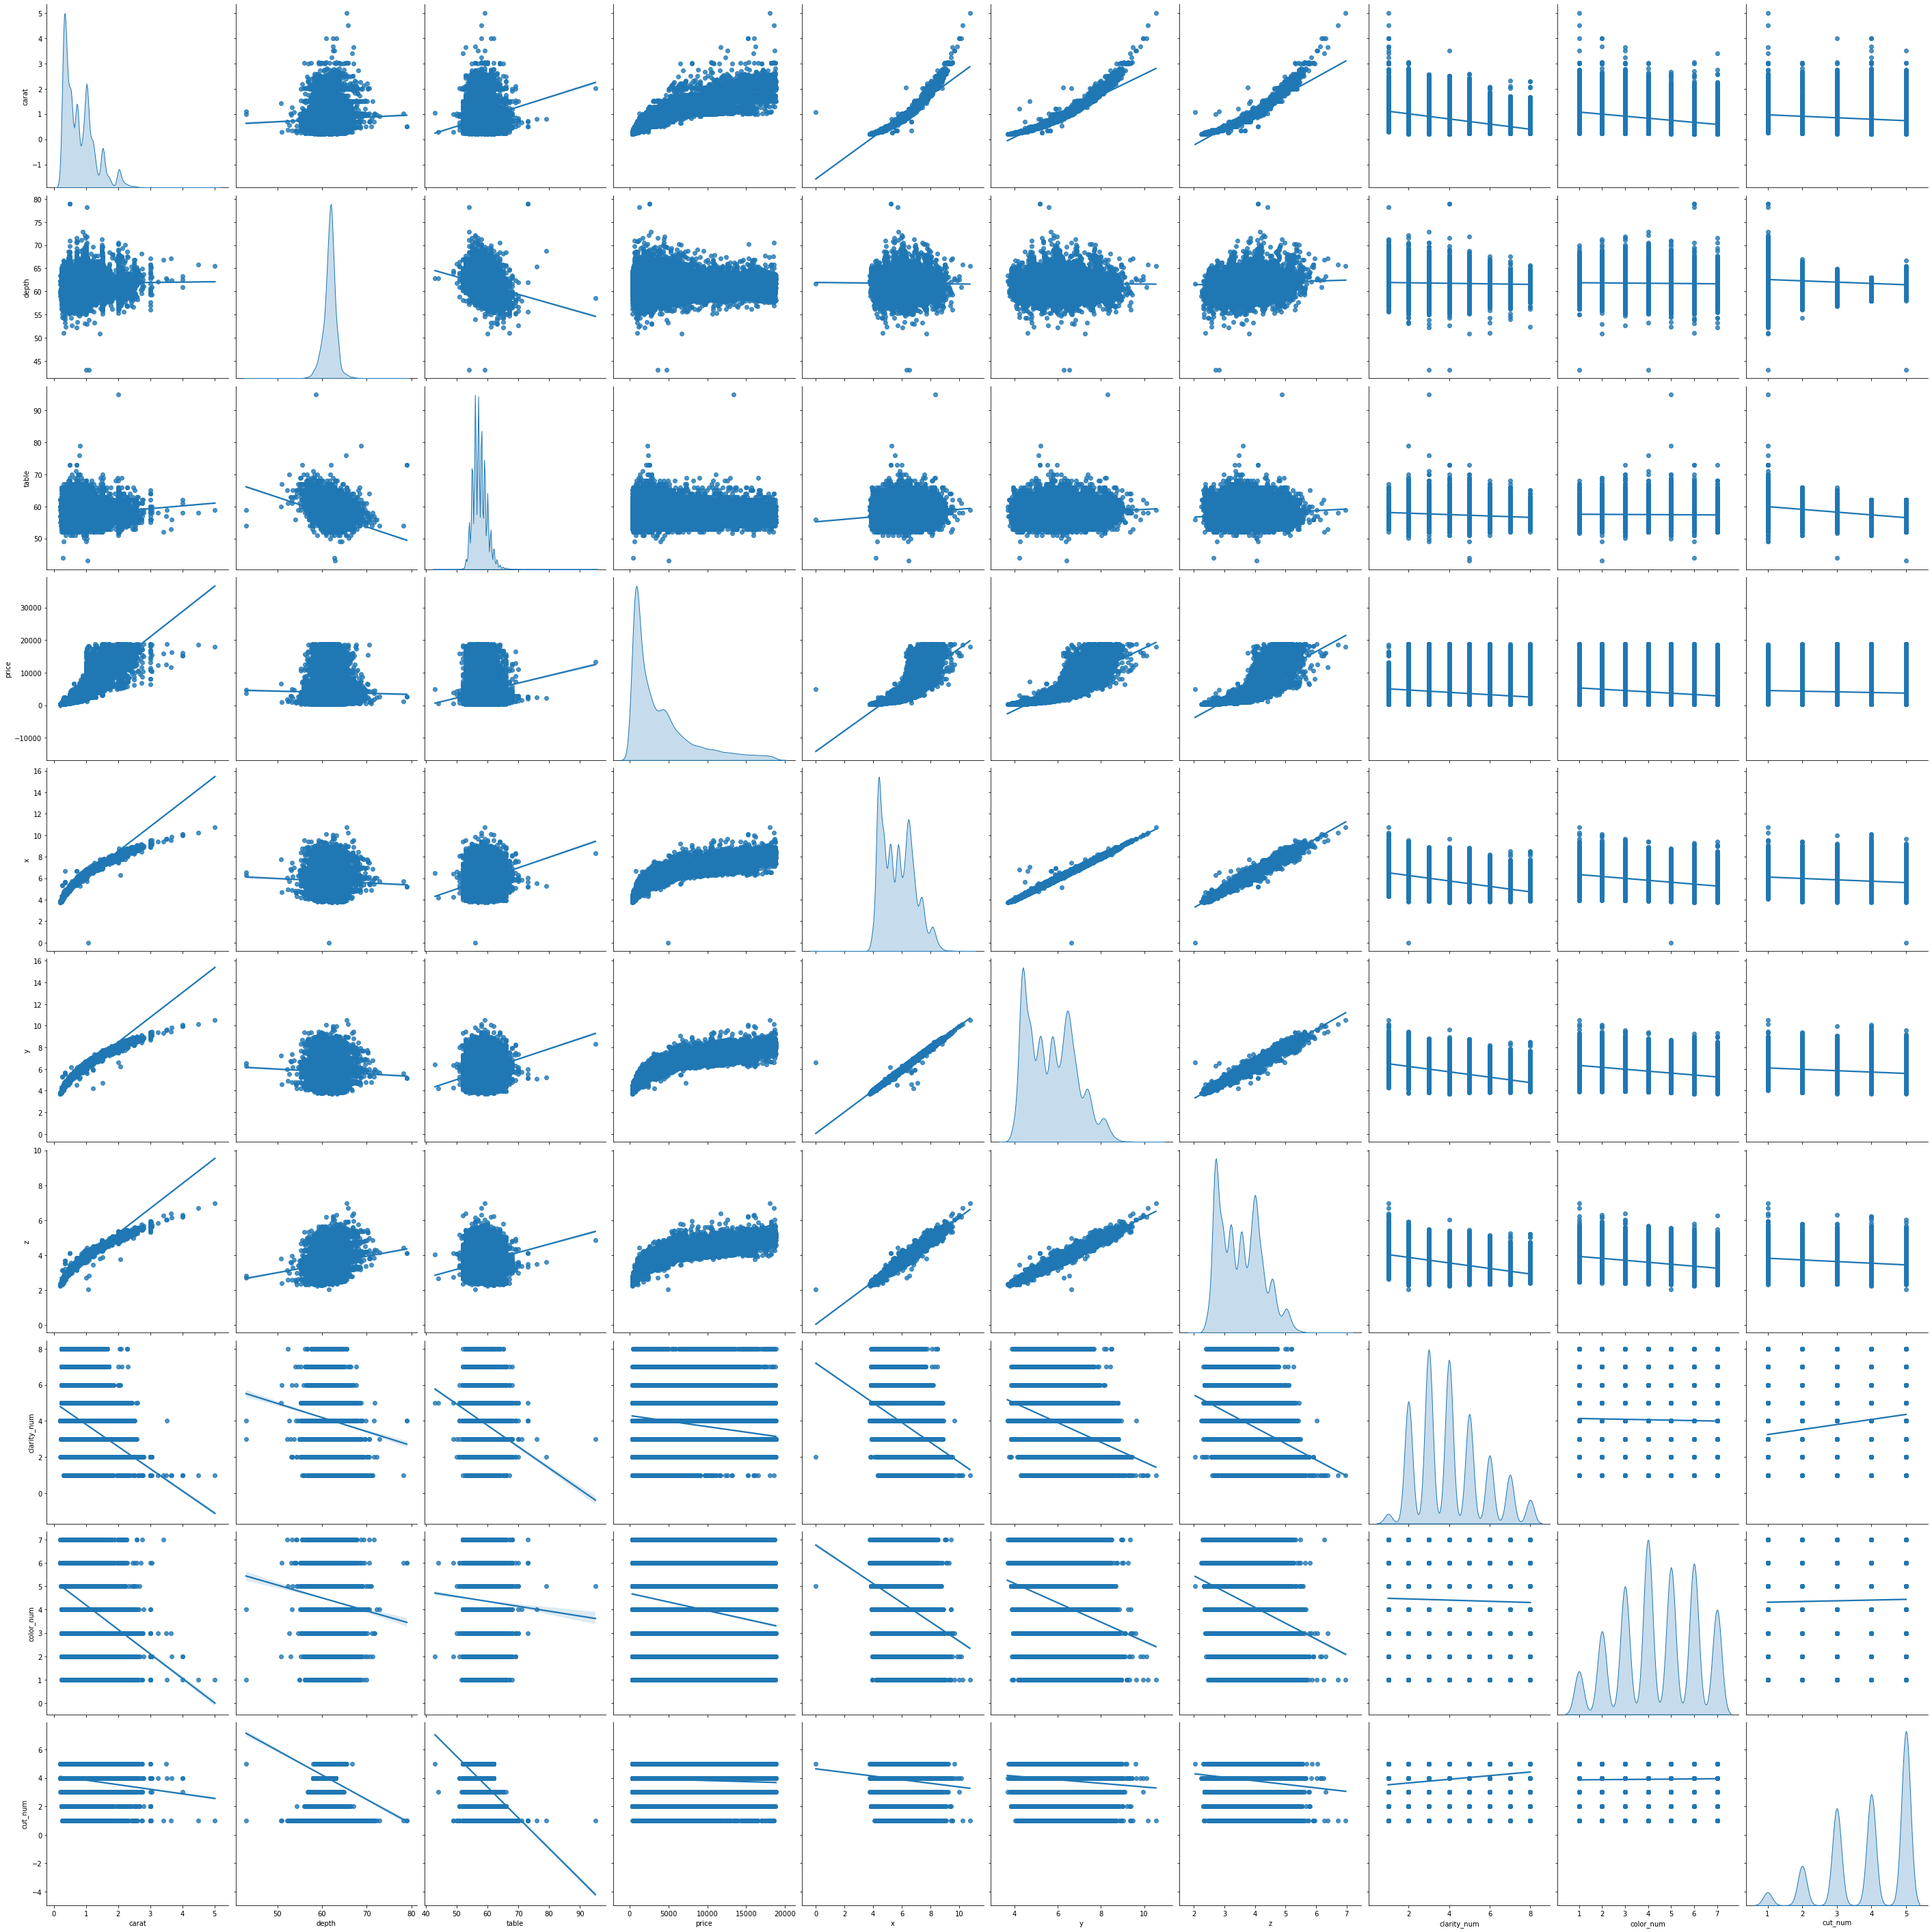

In [84]:
sns.pairplot(data = diamonds, diag_kind = 'kde', kind = 'reg', height = 4)

<AxesSubplot:xlabel='cut', ylabel='depth'>

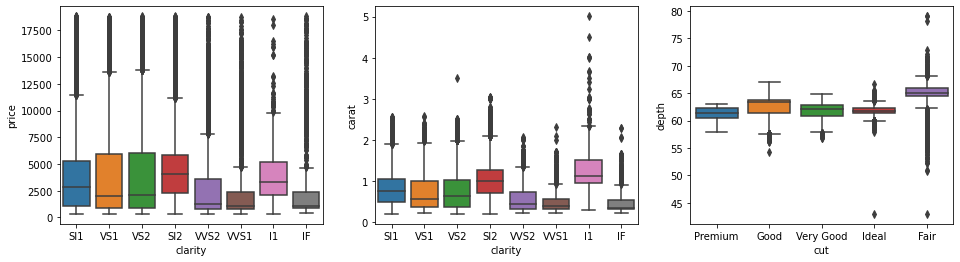

In [38]:
fig, ax = plt.subplots(1,3, figsize = (16,4))
sns.boxplot(data = diamonds, x = 'clarity', y = 'price', ax=ax[0])
sns.boxplot(data = diamonds, x = 'clarity', y = 'carat', ax=ax[1])
sns.boxplot(data = diamonds, x = 'cut', y = 'depth', ax=ax[2])

<AxesSubplot:xlabel='carat', ylabel='price'>

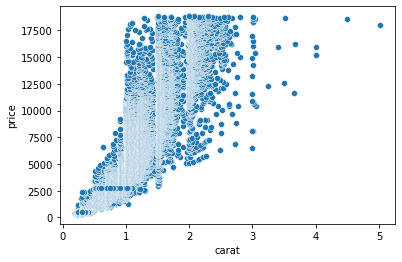

In [37]:
sns.scatterplot(data = diamonds, x = 'carat', y = 'price')

<AxesSubplot:xlabel='carat', ylabel='price'>

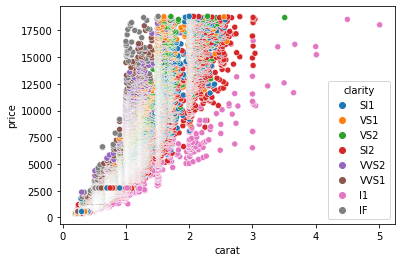

In [39]:
sns.scatterplot(data = diamonds, x = 'carat', y = 'price', hue='clarity')

<AxesSubplot:xlabel='carat', ylabel='price'>

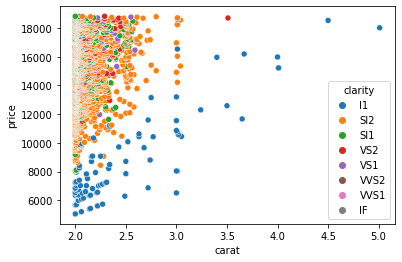

In [40]:
sns.scatterplot(data = diamonds[diamonds['carat']>=2], x = 'carat', y = 'price', hue='clarity')

In [ ]:
diamonds['log_carat'] = np.log(diamonds['carat'])
diamonds['log_price'] = np.log(diamonds['price'])

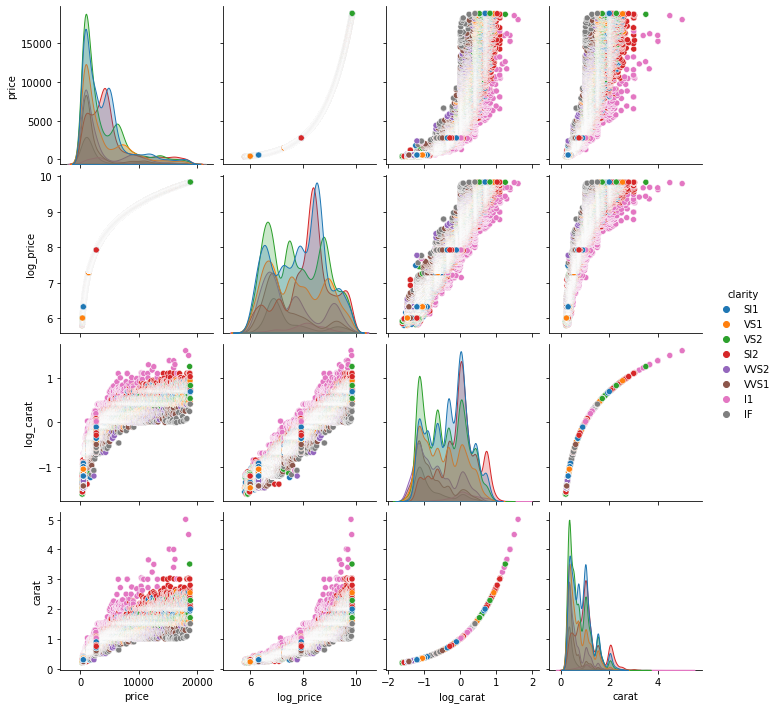

In [72]:
sns.pairplot(diamonds[['price', 'log_price', 'log_carat', 'carat', 'clarity']], hue='clarity')

<AxesSubplot:xlabel='log_carat', ylabel='log_price'>

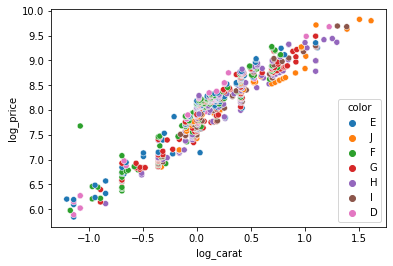

In [143]:
sns.scatterplot(data = diamonds[diamonds['clarity']=='I1'], x = 'log_carat', y = 'log_price', hue='color')

In [42]:
diamondscla = diamonds.groupby('clarity')
diamondsclaI1=diamonds[diamonds['clarity']=='I1']

<AxesSubplot:xlabel='depth', ylabel='price'>

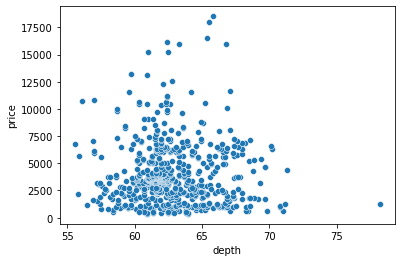

In [145]:
sns.scatterplot(data = diamondsclaI1, x = 'depth', y = 'price')

<AxesSubplot:xlabel='price', ylabel='depth'>

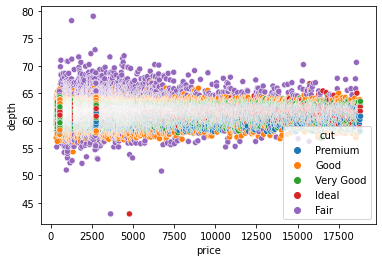

In [139]:
sns.scatterplot(data = diamonds, x = 'price', y = 'depth', hue='cut')

<AxesSubplot:xlabel='price', ylabel='depth'>

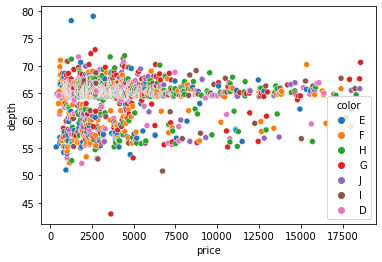

In [141]:
sns.scatterplot(data = diamonds[diamonds['cut']=='Fair'], x = 'price', y = 'depth',hue='color')

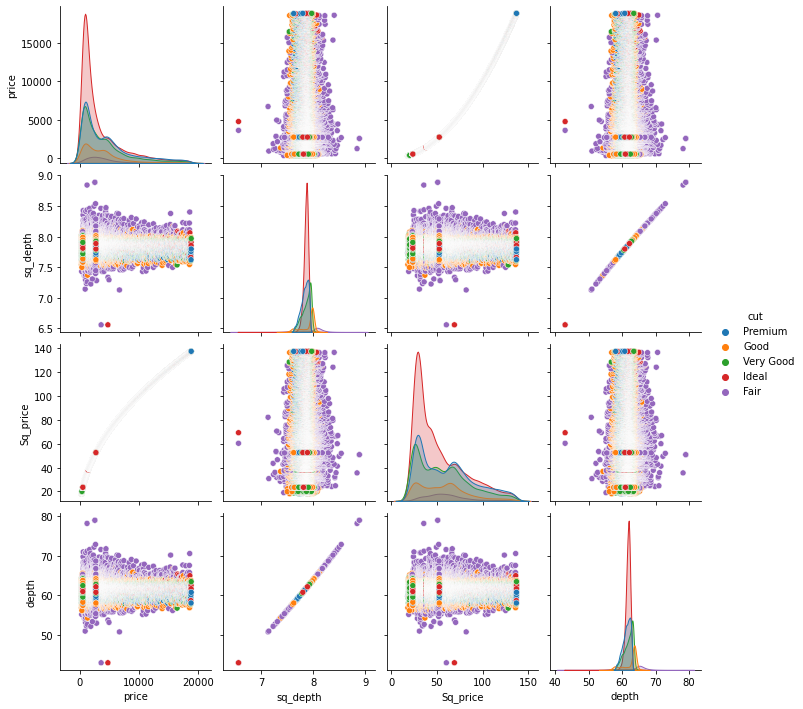

In [74]:
diamonds['sq_depth'] = np.sqrt(diamonds['depth'])
diamonds['Sq_price'] = np.sqrt(diamonds['price'])
sns.pairplot(diamonds[['price', 'sq_depth', 'Sq_price', 'depth','cut']], hue='cut')

In [87]:
diamonds['log_depth'] = np.log(diamonds['depth'])
diamonds['log_price'] = np.log(diamonds['price'])

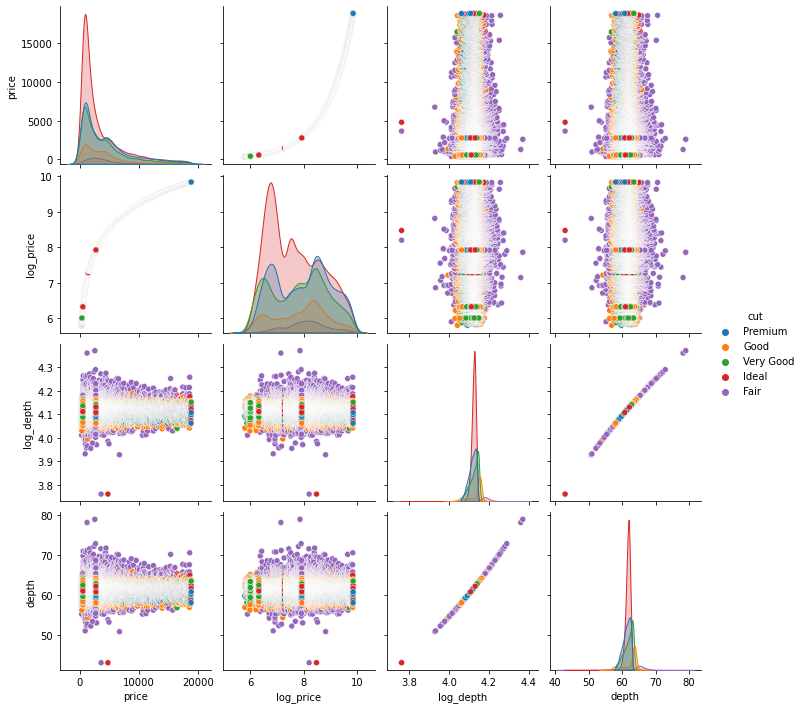

In [75]:
sns.pairplot(diamonds[['price', 'log_price', 'log_depth', 'depth', 'cut']], hue='cut')

In [93]:
diamonds['log_color'] = np.log(diamonds['color_num'])
diamonds['log_cut'] = np.log(diamonds['cut_num'])
diamonds['log_clarity'] = np.log(diamonds['clarity_num'])
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_num,color_num,cut_num,log_carat,log_price,log_depth,pred_lm,log_color,log_cut,log_clarity
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,6,4,-1.560648,5.786897,4.091006,-1391.116561,1.791759,1.386294,1.098612
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5,6,2,-1.469676,5.789960,4.041295,-422.433517,1.791759,0.693147,1.609438
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4,-1.237874,5.811141,4.133565,-370.268563,0.693147,1.386294,1.386294
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2,-1.171183,5.814131,4.147885,-1477.781772,0.000000,0.693147,0.693147
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,6,1,3,-1.427116,5.817111,4.139955,-3.894013,0.000000,1.098612,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,3,7,4,-0.328504,7.921898,4.138361,2749.413657,1.945910,1.386294,1.098612
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3,7,5,-0.328504,7.921898,4.107590,2982.547907,1.945910,1.609438,1.098612
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3,7,2,-0.328504,7.921898,4.144721,2445.390875,1.945910,0.693147,1.098612
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3,7,3,-0.356675,7.921898,4.139955,2434.373561,1.945910,1.098612,1.098612


In [146]:
X = sm.add_constant(diamonds[['carat','clarity_num','cut_num','color_num','depth']])
Y = (diamonds['price'])
modelo = sm.OLS(Y, X)
lm_fit = modelo.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 9.328e+04
Date:                Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:26:56   Log-Likelihood:            -4.1753e+05
No. Observations:               48932   AIC:                         8.351e+05
Df Residuals:                   48926   BIC:                         8.351e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5368.6508    254.727    -21.076      0.000   -5867.919   -4869.382
carat        8783.0849     13.272    661.765      0.000    8757.071    8809.099
clarity_num   522.4078      3.692    141.488      0.000     515.171     529.645
cut_num       147.0116      5.201     28.267      0.000     136.818     157.205
color_num     318.3378      3.457     92.079      0.000     311.562     325.114
depth         -29.1538      3.990     -7.306      0.000     -36.975     -21.333
==============================================================================
Omnibus:                     9738.126   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           216849.706
Skew:                           0.381   Prob(JB):                         0.00
Kurtosis:                      13.285   Cond. No.                     2.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
X = sm.add_constant(diamonds[['log_carat','log_clarity','log_cut','log_color','log_depth']])
Y = np.log(diamonds['price'])
modelo = sm.OLS(Y, X)
lm_fit = modelo.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 5.372e+05
Date:                Sat, 12 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:09:29   Log-Likelihood:                 28302.
No. Observations:               48932   AIC:                        -5.659e+04
Df Residuals:                   48926   BIC:                        -5.654e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.7293      0.114     67.973      0.000       7.506       7.952
log_carat       1.8826      0.001   1578.230      0.000       1.880       1.885
log_clarity     0.4798      0.002    302.234      0.000       0.477       0.483
log_cut         0.0944      0.002     53.121      0.000       0.091       0.098
log_color       0.2768      0.001    210.774      0.000       0.274       0.279
log_depth      -0.0812      0.027     -2.964      0.003      -0.135      -0.028
==============================================================================
Omnibus:                     3373.160   Durbin-Watson:                   1.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14478.221
Skew:                           0.206   Prob(JB):                         0.00
Kurtosis:                       5.633   Cond. No.                         925.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
diamonds['pred_lm'] = np.exp(lm_fit.predict())
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_num,color_num,cut_num,log_carat,log_price,log_depth,pred_lm,log_color,log_cut,log_clarity
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,6,4,-1.560648,5.786897,4.091006,273.923844,1.791759,1.386294,1.098612
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5,6,2,-1.469676,5.789960,4.041295,390.657442,1.791759,0.693147,1.609438
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4,-1.237874,5.811141,4.133565,424.547822,0.693147,1.386294,1.386294
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2,-1.171183,5.814131,4.147885,266.558829,0.000000,0.693147,0.693147
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,6,1,3,-1.427116,5.817111,4.139955,289.976052,0.000000,1.098612,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,3,7,4,-0.328504,7.921898,4.138361,2896.606789,1.945910,1.386294,1.098612
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3,7,5,-0.328504,7.921898,4.107590,2965.651236,1.945910,1.609438,1.098612
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3,7,2,-0.328504,7.921898,4.144721,2711.795717,1.945910,0.693147,1.098612
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3,7,3,-0.356675,7.921898,4.139955,2673.069811,1.945910,1.098612,1.098612


In [128]:
X = np.log(diamonds[['carat','clarity_num','cut_num','color_num','depth']])
modelo = LinearRegression()
lm_fit = modelo.fit(X,Y)
pred_price = modelo.predict(X)
pred_price

array([5.61285012, 5.96783107, 6.05102466, ..., 7.90536632, 7.89098283,
       7.87531252])

In [129]:
modelo.coef_

array([ 1.88259502,  0.47980025,  0.09437042,  0.27675945, -0.08119549])

In [130]:
modelo.intercept_

7.729262998032858

In [131]:
mean_squared_error(Y,pred_price)

0.018413831651958572

In [132]:
modelo.score(X,Y)

0.9821105242081017

In [133]:
r2_score(Y,pred_price)

0.9821105242081017

In [134]:
np.sqrt(mean_squared_error(Y, pred_price))

0.13569757423019238

In [117]:
rick_diamonds = pd.read_csv('rick_diamonds.csv')
rick_diamonds['clarity_num'] = rick_diamonds['clarity'].replace(['I1',"SI2","SI1","VS2","VS1","VVS2","VVS1","IF"],[1,2,3,4,5,6,7,8])
rick_diamonds['color_num'] = rick_diamonds['color'].replace(['J',"I","H","G","F","E","D"],[1,2,3,4,5,6,7])
rick_diamonds['cut_num'] = rick_diamonds['cut'].replace(["Fair", "Good", "Very Good", "Premium", "Ideal"],[1,2,3,4,5])
rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,clarity_num,color_num,cut_num
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2,3,3
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4,5,2
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4,3,5
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,4,5
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,2,7,3
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,6,5,5
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3,5,3
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,7,5,5


In [135]:
Rick_X = np.log(rick_diamonds[['carat','clarity_num','cut_num','color_num','depth']])
rick_diamonds['price_predicted'] = modelo.predict(Rick_X)
rick_diamonds['price_predicted'] = np.exp(rick_diamonds['price_predicted'])
rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,clarity_num,color_num,cut_num,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2,3,3,2850.063253
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4,5,2,854.768772
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4,3,5,1457.417034
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,4,5,7203.143655
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2,4,5,18295.273269
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,2,7,3,446.795647
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,6,5,5,1965.793784
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3,5,3,4870.555730
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,7,5,5,828.919359


In [136]:
rick_diamonds.to_csv('rick_diamonds_predict.csv')